In [8]:
from sklearn import datasets
from layer import layer
from network import neural_network
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from Optimizers import *
import loss_funcs as losses

In [9]:
# # generate random data

DATA, LABELS = datasets.make_circles(
                                n_samples = 2000,
                                noise=0.03
                           )

# DATA, LABELS = datasets.make_classification(n_samples = 1000
#                             ,n_features = 2
#                             ,n_informative = 1
#                             ,n_redundant = 0
#                             ,n_clusters_per_class = 1
#                             ,flip_y = 0
#                             ,class_sep = 2
#                             ,random_state = 150
#                            )

x_train , x_test , y_train , y_test = train_test_split(DATA,LABELS,test_size=0.2)


y_train = np.reshape(y_train,newshape=(y_train.shape[0],1))
y_test = np.reshape(y_test,newshape=(y_test.shape[0],1))
M = x_train.shape[0]
N = x_train.shape[1]

# create a model
model  = neural_network()
model.compile(
    optimizer=Optimizers.BatchGradientDescent,
    Cost=losses.BinaryCrossEntropy()
)
model  = model.sequential(
    [
        layer(2,20,"relu"),
        layer(20,20,"relu"),
        layer(20,1,"sigmoid")
    ]
)

# train model
model,costs = model.fit(x_train,y_train,0.01,50000)

0 cost : 0.7131408587513965 accuracy : 51.31%
5000 cost : 0.678256349750248 accuracy : 62.25%
10000 cost : 0.6645568213094418 accuracy : 69.38%
15000 cost : 0.646822799538363 accuracy : 72.75%
20000 cost : 0.6250262620716701 accuracy : 76.94%
25000 cost : 0.6004569104568226 accuracy : 82.19%
30000 cost : 0.5721525348867925 accuracy : 88.62%
35000 cost : 0.5390371682406695 accuracy : 92.81%
40000 cost : 0.5039013301786998 accuracy : 95.06%
45000 cost : 0.4726013631601904 accuracy : 96.31%
 cost : 0.446746094722632 accuracy : 96.25%


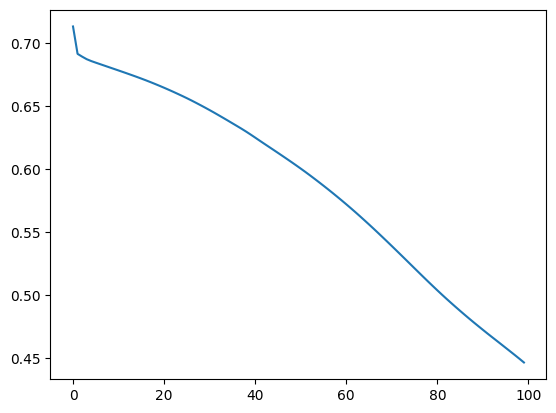

In [12]:
plt.plot(costs)

In [13]:
accuracy = ((x_test.shape[0] - np.sum((model.predict(x_test) != y_test).astype(int))) / x_test.shape[0] ) * 100

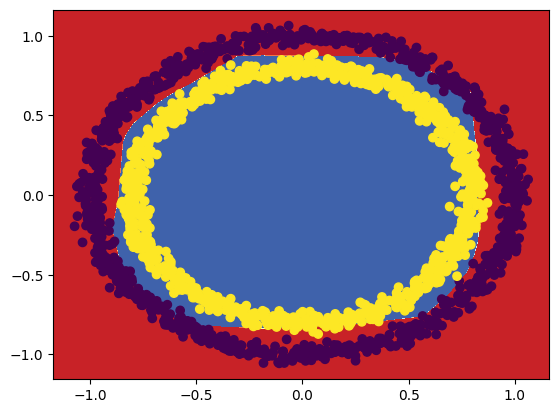

In [14]:

x_min , x_max = DATA[:,0].min() - 0.1 , DATA[:,0].max() + 0.1
y_min , y_max = DATA[:,1].min() - 0.1 , DATA[:,1].max() + 0.1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,1000),np.linspace(y_min,y_max,1000))
np.linspace(y_min,y_max,100)
x_in = np.c_[xx.ravel(),yy.ravel()]
y_pred = model.predict(x_in).reshape(xx.shape)

plt.contourf(xx,yy,y_pred,cmap= plt.cm.RdYlBu)
plt.scatter(DATA[:,0],DATA[:,1],c = LABELS)

In [15]:
accuracy

95.5

In [16]:
costs[-1]

0.446746094722632